In [7]:
import tensorflow as tf
import numpy as np
import progressbar
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [8]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from array import array 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
# df=pd.read_csv("BTC-USD.csv")
# df.tail(5)


In [9]:
import yfinance as yf

stock = yf.Ticker("BTC-USD")
hist = stock.history(period="5y")
hist.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-25,32285.798828,34802.742188,32087.787109,32366.392578,59897054838,0,0
2021-01-26,32358.613281,32794.550781,31030.265625,32569.849609,60255421470,0,0
2021-01-27,32564.029297,32564.029297,29367.138672,30432.546875,62576762015,0,0
2021-01-28,30441.041016,31891.300781,30023.207031,31649.605469,78948162368,0,0
2021-01-29,34318.671875,38406.261719,32064.814453,34316.386719,117894572511,0,0
2021-01-30,34295.933594,34834.707031,32940.187500,34269.523438,65141828798,0,0
2021-01-31,34270.878906,34288.332031,32270.175781,33114.359375,52754542671,0,0
2021-02-01,33114.578125,34638.214844,32384.228516,33537.175781,61400400660,0,0
2021-02-02,33533.199219,35896.882812,33489.218750,35510.289062,63088585433,0,0


In [10]:
df=hist
d=30
ahead=10
n=int(hist.shape[0]*0.8)
training_set = df.iloc[:n, 1:2].values
test_set = df.iloc[n:, 1:2].values

In [11]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(d, n-ahead):
    X_train.append(training_set_scaled[i-d:i, 0])
    y_train.append(training_set_scaled[i+ahead, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
45/45 [==============================] - 7s 45ms/step - loss: 0.0324
Epoch 2/50
45/45 [==============================] - 2s 45ms/step - loss: 0.0075
Epoch 3/50
45/45 [==============================] - 2s 49ms/step - loss: 0.0063
Epoch 4/50
45/45 [==============================] - 2s 44ms/step - loss: 0.0073
Epoch 5/50
45/45 [==============================] - 2s 44ms/step - loss: 0.0055
Epoch 6/50
45/45 [==============================] - 2s 45ms/step - loss: 0.0068
Epoch 7/50
45/45 [==============================] - 2s 45ms/step - loss: 0.0056
Epoch 8/50
45/45 [==============================] - 2s 46ms/step - loss: 0.0058
Epoch 9/50
45/45 [==============================] - 2s 54ms/step - loss: 0.0047
Epoch 10/50
45/45 [==============================] - 2s 49ms/step - loss: 0.0050
Epoch 11/50
45/45 [==============================] - 2s 48ms/step - loss: 0.0044
Epoch 12/50
45/45 [==============================] - 2s 52ms/step - loss: 0.0059
Epoch 13/50
45/45 [==================

In [8]:
model.save("BTC-predict.h5")

In [13]:
# Getting the predicted stock price

dataset_train = df.iloc[:n, 1:2]
dataset_test = df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [14]:
X_test = []
for i in range(d, inputs.shape[0]):
    X_test.append(inputs[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(365, 30, 1)


In [15]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [16]:
df['Date']=df.index

In [17]:
df=df.reset_index(drop=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,374.645996,374.950012,368.045013,369.949005,45933400,0,0,2016-02-03
1,370.174011,391.608002,369.993011,389.593994,69285504,0,0,2016-02-04
2,388.898010,391.093994,385.571991,386.549011,43825000,0,0,2016-02-05
3,386.588989,386.631012,372.386993,376.522003,49249300,0,0,2016-02-06
4,376.514008,380.871002,374.903015,376.619995,37076300,0,0,2016-02-07
...,...,...,...,...,...,...,...,...
1819,34295.933594,34834.707031,32940.187500,34269.523438,65141828798,0,0,2021-01-30
1820,34270.878906,34288.332031,32270.175781,33114.359375,52754542671,0,0,2021-01-31
1821,33114.578125,34638.214844,32384.228516,33537.175781,61400400660,0,0,2021-02-01
1822,33533.199219,35896.882812,33489.218750,35510.289062,63088585433,0,0,2021-02-02


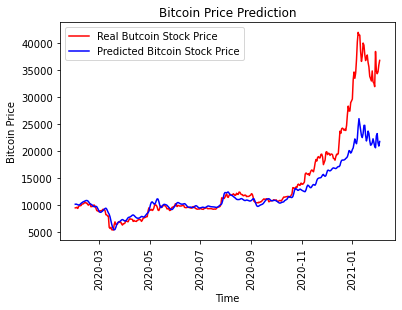

In [18]:
plt.plot(df.loc[n:, 'Date'],dataset_test.values, color = 'red', label = 'Real Butcoin Stock Price')
plt.plot(df.loc[n:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Bitcoin Stock Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.xticks(rotation=90)
plt.show()

## Get tomorrow's predicted price

In [20]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,374.645996,374.950012,368.045013,369.949005,45933400,0,0,2016-02-03
1,370.174011,391.608002,369.993011,389.593994,69285504,0,0,2016-02-04
2,388.898010,391.093994,385.571991,386.549011,43825000,0,0,2016-02-05
3,386.588989,386.631012,372.386993,376.522003,49249300,0,0,2016-02-06
4,376.514008,380.871002,374.903015,376.619995,37076300,0,0,2016-02-07
...,...,...,...,...,...,...,...,...
1819,34295.933594,34834.707031,32940.187500,34269.523438,65141828798,0,0,2021-01-30
1820,34270.878906,34288.332031,32270.175781,33114.359375,52754542671,0,0,2021-01-31
1821,33114.578125,34638.214844,32384.228516,33537.175781,61400400660,0,0,2021-02-01
1822,33533.199219,35896.882812,33489.218750,35510.289062,63088585433,0,0,2021-02-02


In [21]:
## Add a dummy row at the end. This will not be used to predict. 

df.loc[len(df)]=df.loc[len(df)-1]

In [22]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,374.645996,374.950012,368.045013,369.949005,45933400,0,0,2016-02-03
1,370.174011,391.608002,369.993011,389.593994,69285504,0,0,2016-02-04
2,388.898010,391.093994,385.571991,386.549011,43825000,0,0,2016-02-05
3,386.588989,386.631012,372.386993,376.522003,49249300,0,0,2016-02-06
4,376.514008,380.871002,374.903015,376.619995,37076300,0,0,2016-02-07
...,...,...,...,...,...,...,...,...
1820,34270.878906,34288.332031,32270.175781,33114.359375,52754542671,0,0,2021-01-31
1821,33114.578125,34638.214844,32384.228516,33537.175781,61400400660,0,0,2021-02-01
1822,33533.199219,35896.882812,33489.218750,35510.289062,63088585433,0,0,2021-02-02
1823,36089.023438,36753.347656,35448.914062,36631.023438,66044252160,0,0,2021-02-03


In [23]:
# Getting the predicted stock price

dataset_train = df.iloc[:n, 1:2]
dataset_test = df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [24]:
X_test = []
for i in range(d, inputs.shape[0]):
    X_test.append(inputs[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(366, 30, 1)


In [25]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [30]:
float(predicted_stock_price[-1])

23106.318359375

In [36]:
print("Tomorrow's predicted price = $", float(predicted_stock_price[-1]))

Tomorrow's predicted price = $ 23106.318359375
